In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
import keras
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
from keras.initializers import he_normal, random_normal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

In [ ]:
# Load the dataset
train_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra")
test_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes")

In [ ]:
train_df.head()

,0,1,6,15,12,1.1,0.1,0.2,0.3,7,...,0.21,0.22,0.23,6.3,14.1,7.4,1.3,0.24,0.25,0.26
0,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
1,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
2,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
3,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6
4,0,0,11,16,10,1,0,0,0,4,...,3,0,0,10,16,16,16,16,6,2


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       3822 non-null   int64
 1   1       3822 non-null   int64
 2   6       3822 non-null   int64
 3   15      3822 non-null   int64
 4   12      3822 non-null   int64
 5   1.1     3822 non-null   int64
 6   0.1     3822 non-null   int64
 7   0.2     3822 non-null   int64
 8   0.3     3822 non-null   int64
 9   7       3822 non-null   int64
 10  16      3822 non-null   int64
 11  6.1     3822 non-null   int64
 12  6.2     3822 non-null   int64
 13  10      3822 non-null   int64
 14  0.4     3822 non-null   int64
 15  0.5     3822 non-null   int64
 16  0.6     3822 non-null   int64
 17  8       3822 non-null   int64
 18  16.1    3822 non-null   int64
 19  2       3822 non-null   int64
 20  0.7     3822 non-null   int64
 21  11      3822 non-null   int64
 22  2.1     3822 non-null   int64
 23  0.8     3822 

In [ ]:
train_df.shape

(3822, 65)

In [ ]:
X_train, y_train = train_df.iloc[:, :64].values, train_df.iloc[:, 64].values
X_test, y_test = test_df.iloc[:, :64].values, test_df.iloc[:, 64].values

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
label_as_binary = LabelBinarizer()
y_train_labels = label_as_binary.fit_transform(y_train)
y_test_labels = label_as_binary.fit_transform(y_test)

In [ ]:
model = Sequential()
model.add(Dense(units=128,activation='tanh'))
model.add(Dense(units=64,activation='tanh'))
model.add(Dense(units=10,activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train_labels, batch_size=128, epochs=100)
print("The model has successfully trained")

Epoch 1/100
30/30 [==============================] - 1s 3ms/step - loss: 2.2302 - accuracy: 0.4681
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 1.9808 - accuracy: 0.7598
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 1.5091 - accuracy: 0.8114
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 1.0177 - accuracy: 0.8571
Epoch 5/100
30/30 [==============================] - 0s 3ms/step - loss: 0.6982 - accuracy: 0.8959
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.5058 - accuracy: 0.9176
Epoch 7/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3892 - accuracy: 0.9257
Epoch 8/100
30/30 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.9320
Epoch 9/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2707 - accuracy: 0.9437
Epoch 10/100
30/30 [==============================] - 0s 2ms/step - loss: 0.2367 - accuracy: 0.9437
Epoch 11/

In [ ]:
score = model.evaluate(X_test, y_test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1590173840522766
Test accuracy: 0.9521158337593079


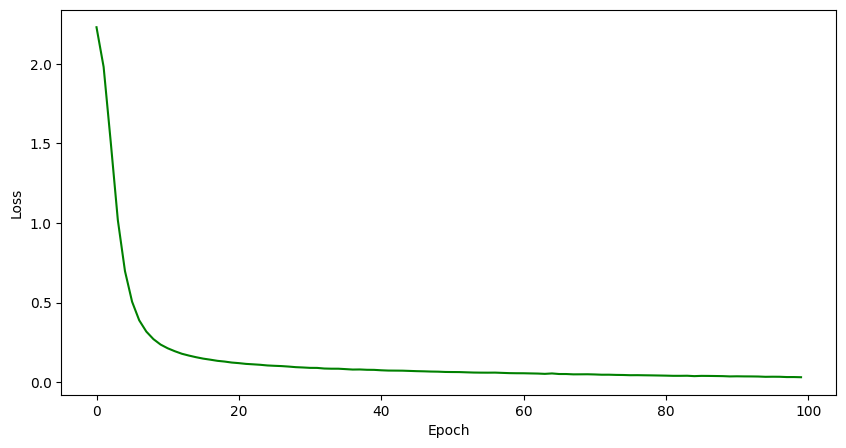

In [ ]:
# Plot training loss over epochs
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'g', label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()